In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from sympy import symbols, solve
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
import arch


https://medium.com/@FuturisPerpetuum/building-a-garch-volatility-model-in-python-a-step-by-step-tutorial-with-statistical-analysis-2a33b49a2701



https://medium.com/auquan/time-series-analysis-for-finance-arch-garch-models-822f87f1d755


https://pyflux.readthedocs.io/en/latest/garch.html


https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/

### TEST

In [2]:
np.random.seed(123)
ts = np.random.randn(1000)

In [3]:
# Create a pandas dataframe with the time series
df = pd.DataFrame({'returns': ts})
df

returns
0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
..        ...
995  0.634763
996  1.069919
997 -0.909327
998  0.470264
999 -1.111430

[1000 rows x 1 columns]

In [5]:
model_test = arch.arch_model(df['returns'], vol='GARCH', p=1, q=1)
results_test = model_test.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1106377949.8426666
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5111.641226754217
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1986.8725010167389
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1419.2267239322841
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1418.897916036949
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1418.1029983576018
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1417.8888040518827
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1417.8274556345987
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1417.9287847981848
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1417.7609622457785
Iteration:     11,   Func. Count:     68,   Neg. LLF: 1417.7573954542827
Iteration:     12,   Func. Count:     73,   Neg. LLF: 1417.7573388432872
Iteration:     13,   Func. Count:     78,   Neg. LLF: 1417.7573192709172
Iteration:     14,   Func. Count:     83,   Neg. LLF:

### Our data

In [7]:
df_data = pd.read_excel('Dat.xlsx', header=[0,1], index_col=0)

In [17]:
df_data['Last Price'].T['AAPL']

Tickers
2006-12-31      2.750
2007-12-31      7.074
2008-12-31      3.048
2009-12-31      7.526
2010-12-31     11.520
2011-12-30     14.464
2012-12-31     19.006
2013-12-31     20.036
2014-12-31     27.595
2015-12-31     26.315
2016-12-30     28.955
2017-12-29     42.308
2018-12-31     39.435
2019-12-31     73.413
2020-12-31    132.690
2021-12-31    177.570
Name: AAPL, dtype: float64

In [18]:
model = arch.arch_model(df_data['Last Price'].T['AAPL'], vol='GARCH', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 79.22535365195583
Iteration:      2,   Func. Count:     11,   Neg. LLF: 79.16060317492513
Iteration:      3,   Func. Count:     16,   Neg. LLF: 78.84615928856016
Iteration:      4,   Func. Count:     21,   Neg. LLF: 77.52040377111342
Iteration:      5,   Func. Count:     26,   Neg. LLF: 76.80527940952722
Iteration:      6,   Func. Count:     31,   Neg. LLF: 76.23938005389698
Iteration:      7,   Func. Count:     36,   Neg. LLF: 76.2289366812972
Iteration:      8,   Func. Count:     41,   Neg. LLF: 76.22889676978424
Iteration:      9,   Func. Count:     46,   Neg. LLF: 76.22881322043602
Iteration:     10,   Func. Count:     51,   Neg. LLF: 76.2285679214059
Iteration:     11,   Func. Count:     56,   Neg. LLF: 76.22795476927087
Iteration:     12,   Func. Count:     61,   Neg. LLF: 76.22630931578598
Iteration:     13,   Func. Count:     66,   Neg. LLF: 76.22203497273901
Iteration:     14,   Func. Count:     71,   Neg. LLF: 76.210783214

In [19]:
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -70.6381
Distribution:                  Normal   AIC:                           149.276
Method:            Maximum Likelihood   BIC:                           152.367
                                        No. Observations:                   16
Date:                Tue, Apr 25 2023   Df Residuals:                       15
Time:                        19:05:45   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            13.1057      6.483      2.021  4.324e-02 [  0.398, 25.81

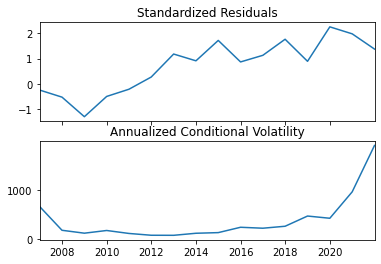

In [28]:
fig = results.plot(annualize='D')
plt.show()

In [24]:
print(results.std_resid.describe())


count    16.000000
mean      0.720260
std       1.034377
min      -1.302199
25%      -0.223360
50%       0.899438
75%       1.459615
max       2.252993
Name: std_resid, dtype: float64


In [32]:
forecast = results.forecast(horizon = 4)

print(forecast.variance[-1:])

                     h.1           h.2           h.3           h.4
Tickers                                                           
2021-12-31  27071.791282  27095.064345  27118.337407  27141.610469


C:\Users\jespe\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
